In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the function to be minimized
def f(w):
    e = np.arange(1, 61)  # e_t values from 1 to 60
    return np.sum(e**2)

# Define the constraint that w1 + w2 + w3 = 1 for all t
def constraint(w):
    return np.sum(w) - 1

# Define the initial weights
w0 = np.random.rand(3)

# Define the bounds for each weight (between 0 and 1)
bounds = [(0, 1) for _ in range(3)]

# Perform the optimization
result = minimize(f, w0, method='SLSQP', bounds=bounds, constraints={'type':'eq', 'fun': constraint})

# Extract the optimized weights
w_optimized = result.x

# Calculate S
S = np.sum(w_optimized)

# Calculate the new weights x
x = w_optimized / S

# Print the results
print("Optimized weights (w):", w_optimized)
print("S:", S)
print("New weights (x):", x)


Optimized weights (w): [0.29148237 0.08067918 0.62783844]
S: 1.0000000000000002
New weights (x): [0.29148237 0.08067918 0.62783844]


In [2]:
import numpy as np

# Define the function f(w) and the constraint function
def f(w):
    e = np.arange(1, 61)
    return np.sum(e**2)

def constraint(w):
    return np.sum(w) - 1

# Initialize variables
w = np.random.rand(3, 60)  # Random initialization of w
delta = 0.25
k = 0

# Pattern Search Algorithm
while True:
    # (a) Increase each w
    w_new = w + delta
    w_new = w_new / np.sum(w_new, axis=0)

    if f(w_new) < f(w):
        w = w_new
        k += 1
        delta = delta / 2
        continue

    # (b) Decrease each w
    w_new = w - delta
    w_new = w_new / np.sum(w_new, axis=0)

    if f(w_new) < f(w):
        w = w_new
        k += 1
        delta = delta / 2
        continue

    # (c) Increase and decrease alternately
    for t in range(60):
        w_new = w.copy()
        if t % 2 == 0:
            w_new[:, t] = w_new[:, t] + delta
        else:
            w_new[:, t] = w_new[:, t] - delta

        w_new = w_new / np.sum(w_new, axis=0)

        if f(w_new) < f(w):
            w = w_new
            k += 1
            delta = delta / 2
            break
    else:
        # (d) Decrease and increase alternately
        for t in range(60):
            w_new = w.copy()
            if t % 2 == 0:
                w_new[:, t] = w_new[:, t] - delta
            else:
                w_new[:, t] = w_new[:, t] + delta

            w_new = w_new / np.sum(w_new, axis=0)

            if f(w_new) < f(w):
                w = w_new
                k += 1
                delta = delta / 2
                break
        else:
            # (e) Modified (a)
            for t in range(60):
                w_new = w.copy()
                w_new[0, t] = w_new[0, t] + delta
                w_new[1, t] = w_new[1, t] - delta
                w_new[2, t] = w_new[2, t] + delta

                w_new = w_new / np.sum(w_new, axis=0)

                if f(w_new) < f(w):
                    w = w_new
                    k += 1
                    delta = delta / 2
                    break
            else:
                # (f) Modified (b)
                for t in range(60):
                    w_new = w.copy()
                    w_new[0, t] = w_new[0, t] - delta
                    w_new[1, t] = w_new[1, t] + delta
                    w_new[2, t] = w_new[2, t] - delta

                    w_new = w_new / np.sum(w_new, axis=0)

                    if f(w_new) < f(w):
                        w = w_new
                        k += 1
                        delta = delta / 2
                        break
                else:
                    break

    # Termination condition (you may define your own)
    if k > 100:
        break

# Final optimized w
print("Optimized weights (w):", w)


Optimized weights (w): [[2.26904572e-01 6.26883021e-01 9.26860133e-01 6.81050482e-02
  6.01909225e-01 3.48782693e-01 2.33406147e-01 6.24618745e-01
  8.07153947e-01 4.87718317e-01 7.34518467e-01 6.04210672e-01
  9.61837293e-01 3.69728356e-02 5.92704856e-01 2.37502393e-01
  3.87197369e-04 1.77613362e-01 8.74153219e-01 7.89804194e-01
  9.34624729e-01 3.51333220e-01 4.41021716e-01 4.58114847e-01
  7.96002953e-02 8.29398141e-01 1.79992966e-01 9.11217044e-02
  1.73220091e-01 1.78713427e-02 5.30184171e-02 3.38925227e-01
  5.47208734e-01 3.17515127e-01 7.96746795e-02 9.34919971e-01
  5.71747163e-01 4.46372904e-01 2.11150581e-01 1.33739577e-01
  4.87454028e-01 8.40226018e-01 2.49345124e-01 9.04113791e-01
  7.26918744e-01 4.30326490e-01 8.85590089e-01 7.10101528e-02
  7.54297979e-01 3.11833145e-01 6.35514297e-01 7.01384040e-02
  8.82458645e-01 1.95211684e-01 9.13018540e-01 5.78143688e-01
  1.86791304e-02 5.52554427e-01 3.83011349e-01 2.49835280e-01]
 [3.16353975e-01 7.63720334e-01 5.55950123e-01

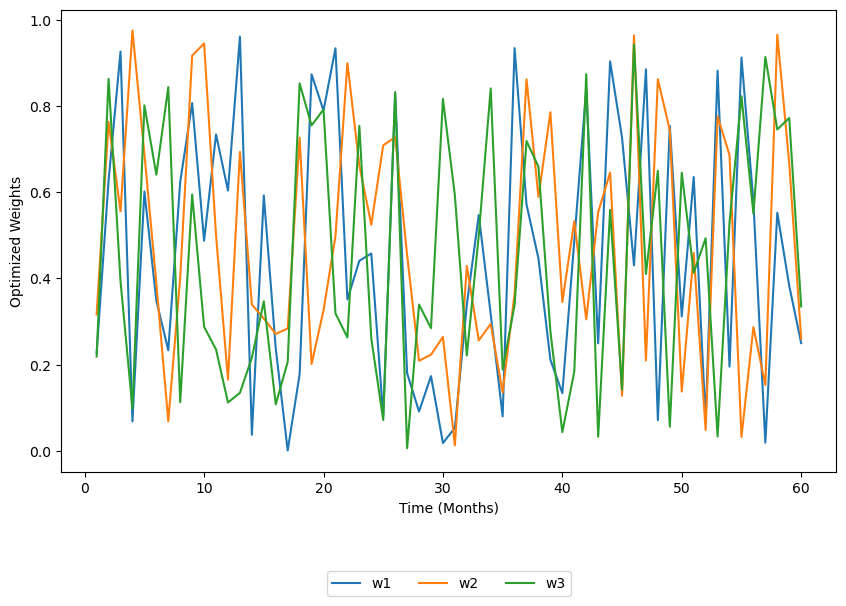

In [4]:
import matplotlib.pyplot as plt, numpy as np

# Assuming you have the optimized weights stored in the variable 'w'
# 'w' should be a 2D array with shape (3, 60) where each column represents a time step

# Define time steps
time_steps = np.arange(1, 61)

# Plot the optimized weights for each time step
plt.figure(figsize=(10, 6))

for i in range(3):
    plt.plot(time_steps, w[i], label=f'w{i+1}')

plt.xlabel('Time (Months)')
plt.ylabel('Optimized Weights')

plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2),ncol = 3)
plt.grid(False)
plt.show()
